In [1]:
# Importing the necessary libraries.
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np  

In [2]:
# Reading a csv file
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Find Null values in our Dataset
data.isnull().sum()
# There is no NULL Values in our dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# Describe our data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Check shape of data
data.shape

(768, 9)

In [6]:
data.BloodPressure.unique()
# Here we cann say one ootlier in BloddPressure Column
# Human cant have 0 blodd pressure

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [7]:
# To avoid this problem we create function which converts value of blodd pressure from 0 to mean of blodd pressure column
def func(df):
    if df == 0:
        return np.mean(data.BloodPressure)
    return df

In [8]:
# Apply our function to blodd pressure column
data['BloodPressure'] = data['BloodPressure'].apply(func)

In [9]:
# After applying this function we can check result
data.BloodPressure.unique()

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,  69.10546875,  70.        ,
        96.        ,  92.        ,  80.        ,  60.        ,
        84.        ,  30.        ,  88.        ,  90.        ,
        94.        ,  76.        ,  82.        ,  75.        ,
        58.        ,  78.        ,  68.        , 110.        ,
        56.        ,  62.        ,  85.        ,  86.        ,
        48.        ,  44.        ,  65.        , 108.        ,
        55.        , 122.        ,  54.        ,  52.        ,
        98.        , 104.        ,  95.        ,  46.        ,
       102.        , 100.        ,  61.        ,  24.        ,
        38.        , 106.        , 114.        ])

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

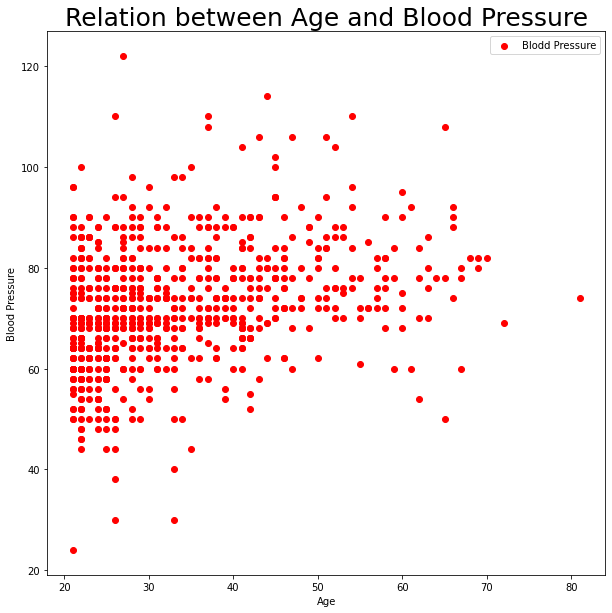

In [11]:
# Find Relation between age and blodd pressure
plt.figure(figsize=(10,10))
plt.scatter(data.Age,data.BloodPressure,label='Blodd Pressure',c='red')
plt.title('Relation between Age and Blood Pressure',{'fontsize':25})
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend();

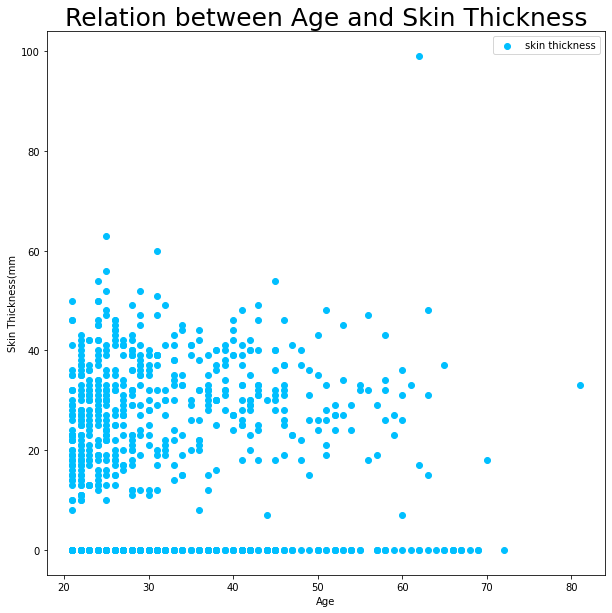

In [12]:
# Plot graph of relation between age and skin thickness
plt.figure(figsize=(10,10))
plt.scatter(data.Age,data.SkinThickness,label='skin thickness',c='deepskyblue')
plt.title("Relation between Age and Skin Thickness",{'fontsize':25})
plt.xlabel("Age")
plt.ylabel("Skin Thickness(mm")
plt.legend();

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


In [14]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [15]:
# Divide data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [29]:
# import logistic regression classifier and feed the trained and tested values to an algorithm
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

C:\Program Files\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Check accuracy of our logistic regression model
print("Logistic Regression" + ": {:.2f}%".format(log_reg.score(X_test, y_test) * 100))

Logistic Regression: 75.32%


In [27]:
# Classification Report of our model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        95
           1       0.77      0.51      0.61        59

    accuracy                           0.75       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.75      0.74       154



In [31]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[86,  9],
       [29, 30]], dtype=int64)